In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("wines.csv")

In [3]:
x=df.drop(['Class'],axis=1)

In [4]:
y=df.loc[:,"Class"]

In [5]:
y_cat=pd.get_dummies(y)

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [7]:
sc=StandardScaler()
X=sc.fit_transform(df.drop('Class',axis=1))

C:\Users\hp\Anaconda1\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda1\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y_cat,random_state=22,test_size=0.2)


In [9]:
from keras.layers import Input
from keras.models import Model

Using TensorFlow backend.


In [10]:
from keras .models import Sequential
from keras .layers import Dense,Activation
from keras.optimizers import Adam
import keras.backend as K
import tensorflow as tf

In [21]:
y_test.shape


(36, 3)

In [25]:
X.shape

(178, 13)

In [52]:
inputs=Input(shape=(13,))
first=Dense(8,kernel_initializer='he_normal', activation='relu')(inputs)
second=Dense(5,kernel_initializer='he_normal', activation='relu')(first)
secondtolast=Dense(2,kernel_initializer='he_normal', activation='relu')(second)
outputs=Dense(3,activation='sigmoid',kernel_initializer='he_normal')(secondtolast)
model=Model(inputs=inputs,outputs=outputs)

model.compile(Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X,y_cat.values,batch_size=16,epochs=20,verbose=1)#If u rdoing things in innerlayer...Dont use X_train,y_train

Epoch 1/20
178/178 [==============================] - 1s 8ms/step - loss: 1.1125 - acc: 0.3876
Epoch 2/20
178/178 [==============================] - 0s 466us/step - loss: 0.9684 - acc: 0.5843
Epoch 3/20
178/178 [==============================] - 0s 471us/step - loss: 0.7964 - acc: 0.6517
Epoch 4/20
178/178 [==============================] - 0s 454us/step - loss: 0.6524 - acc: 0.8427
Epoch 5/20
178/178 [==============================] - 0s 415us/step - loss: 0.5436 - acc: 0.8539
Epoch 6/20
178/178 [==============================] - 0s 516us/step - loss: 0.4671 - acc: 0.8652
Epoch 7/20
178/178 [==============================] - 0s 421us/step - loss: 0.3953 - acc: 0.8876
Epoch 8/20
178/178 [==============================] - 0s 466us/step - loss: 0.3434 - acc: 0.9270
Epoch 9/20
178/178 [==============================] - 0s 449us/step - loss: 0.3051 - acc: 0.9438
Epoch 10/20
178/178 [==============================] - 0s 482us/step - loss: 0.2688 - acc: 0.9775
Epoch 11/20
178/178 [==========

In [53]:
features_function=K.function([inputs],[outputs])

In [54]:
features=features_function([X])[0]

In [55]:
yu=np.asarray(y_cat)

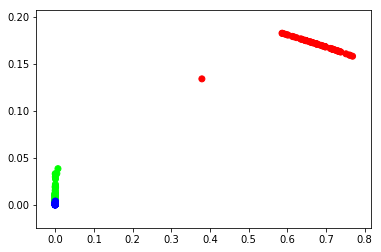

In [56]:
plt.scatter(features[:,0], features[:,1], c=yu)